In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

torch.cuda.get_device_name(0)



'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [1]:
# import wandb
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="del-MC1",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-10",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: denis-schatzmann. Use `wandb login --relogin` to force relogin


acc,▁▄██▆▇▇█
loss,█▄▃▂▂▁▁▂
acc,0.90417
loss,0.07373


In [47]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [48]:
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [49]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [50]:
label_names = unpickle("data/cifar-10-batches-py/batches.meta")[b'label_names']
print(label_names)
label_names = [x.decode('utf-8') for x in label_names]
print(label_names)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [51]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

In [52]:
data_train, labels_train = next(iter(train_dataloader))
print(f"Feature batch shape: {data_train.shape}")
print(f"Labels batch shape: {labels_train.shape}")

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


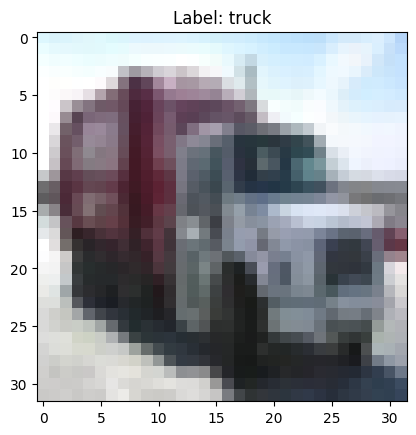

In [53]:
img = data_train[0].squeeze()
label = label_names[labels_train[0]]
# move layer 1 to 3
img = img.permute(1, 2, 0)
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.show()

In [54]:
# Get all Data from CIFAR-10
data_train = training_data.data
labels_train = training_data.targets
print(training_data.data.shape)

(50000, 32, 32, 3)


In [55]:
import numpy as np
index = np.where(np.array(labels_train) == 0)[0]
class_data = data_train[index]
class_data.shape

(5000, 32, 32, 3)

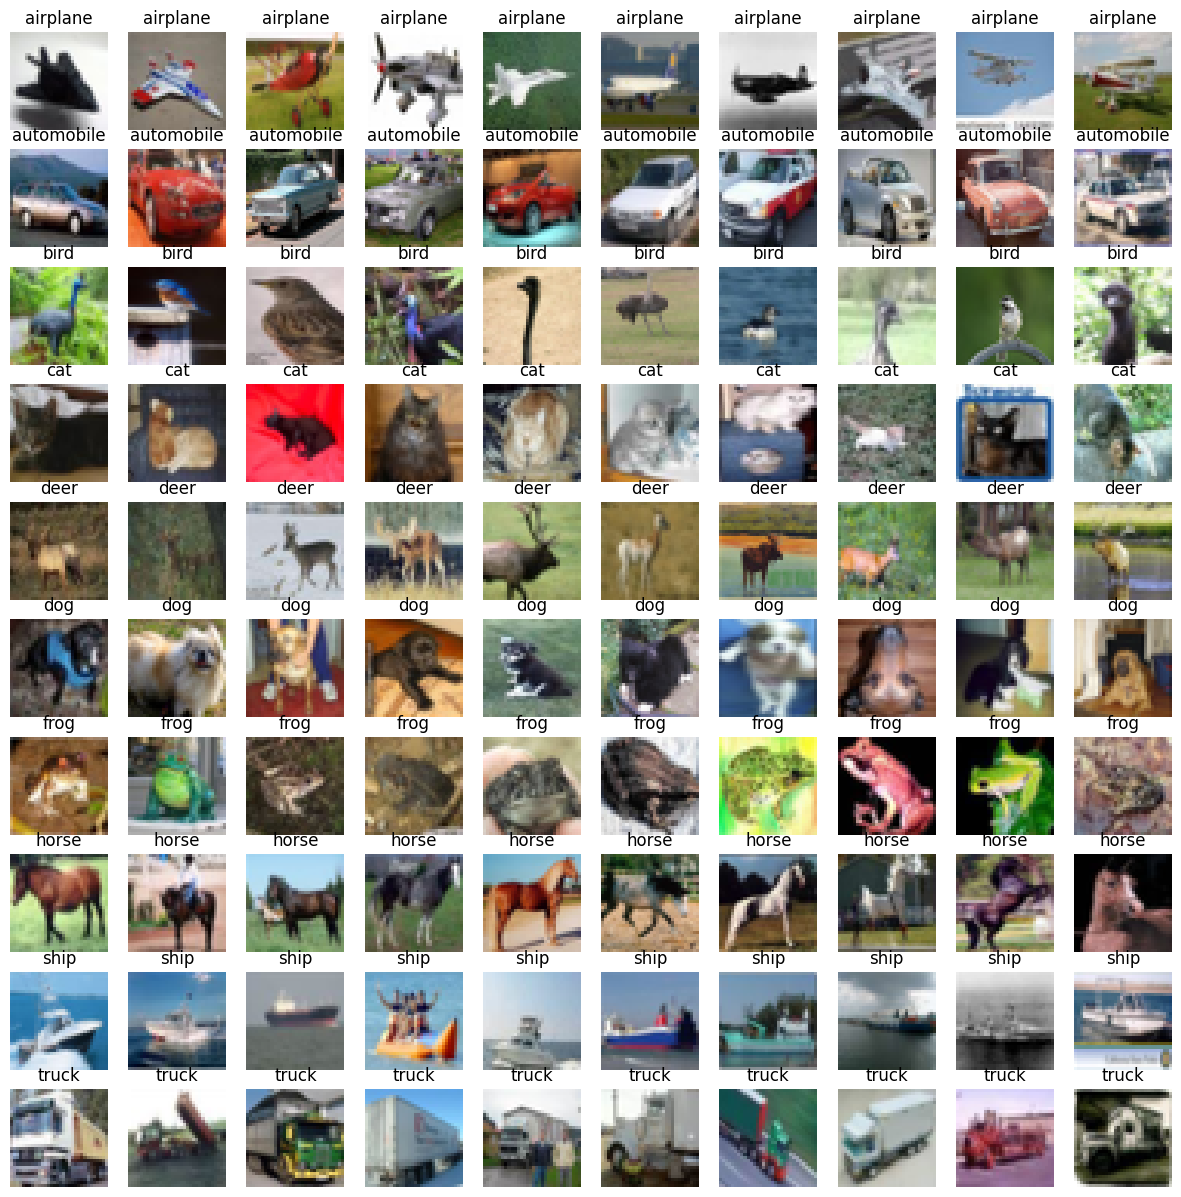

In [56]:
# Show ten Pictures per class in CIFAR-10 resulting in 100 pictures
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    index = np.where(np.array(labels_train) == i)[0]
    class_data = data_train[index]
    for j in range(10):
        img = class_data[j].squeeze()
        axs[i, j].imshow(img, cmap="gray")
        axs[i, j].axis('off')
        axs[i, j].set_title(label_names[i])
plt.show()

## Preprocessing
Ich werde die Farbwerte der Bilder zwischen 0 und 1 skalieren.

In [ ]:
training_data.data = training_data.data / 255

In [ ]:
test_data.data = test_data.data / 255

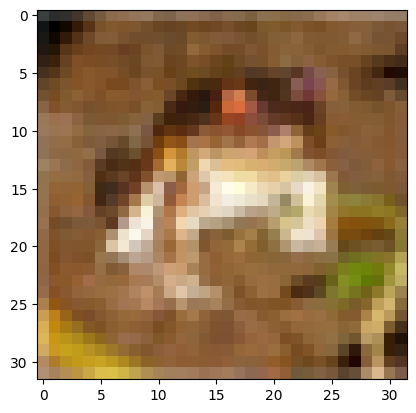

In [65]:
# Control
plt.imshow(training_data.data[0])